In [30]:
import pandas as pd

checkouts_df = pd.read_csv('seattle_checkouts.csv')
checkouts_df

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
0,Digital,OverDrive,EBOOK,2020,4,2,Nighttime Symphony,Timbaland,"Juvenile Fiction, Picture Book Fiction","Simon & Schuster, Inc.",2019
1,Digital,OverDrive,EBOOK,2020,4,2,Cold Kill,Rennie Airth,"Fiction, Mystery, Thriller",Severn House Publishers Ltd,2020
2,Digital,OverDrive,AUDIOBOOK,2020,4,1,The Choice (Unabridged),Nicholas Sparks,"Fiction, Literature",Books on Tape,2007
3,Digital,OverDrive,EBOOK,2020,4,3,The Master Key System,Charles F. Haanel,"New Age, Nonfiction, Self-Improvement",Duke Classics,2020
4,Digital,OverDrive,EBOOK,2020,4,12,The Doughnut King,Jessie Janowitz,"Juvenile Fiction, Juvenile Literature",Sourcebooks,2019
...,...,...,...,...,...,...,...,...,...,...,...
93666,Digital,OverDrive,EBOOK,2020,4,4,"The Black Moth: Historical Romances Series, Bo...",Georgette Heyer,"Fiction, Historical Fiction, Literature, Romance",Sourcebooks,2010
93667,Digital,OverDrive,AUDIOBOOK,2020,4,1,A Death in the Family (Unabridged),James Agee,"Classic Literature, Fiction","Blackstone Audio, Inc.",2012
93668,Digital,OverDrive,EBOOK,2020,4,2,My Fate According to the Butterfly,Gail Villanueva,"Juvenile Fiction, Juvenile Literature","Scholastic, Inc. (US)",2019
93669,Digital,OverDrive,AUDIOBOOK,2020,4,17,The Second Sleep: A novel (unabridged) (Unabri...,Robert Harris,"Fiction, Suspense, Thriller",Books on Tape,2019


# Making a graph

Make a bar graph showing the top 10 most common publishers in the list. 

### Question

What's the error here? Correct it and run the code. 


In [ ]:
publisher_data = checkouts_df["Publisher"].valuecounts()

### Question
What is the *type* of `publisher_data`? How can we get only the *top 10* most common publishers? 

In [ ]:
# Store the top 10 publishers in the variable top_10_publishers_data.  
top_10_publishers_data = 

### Question

Using the `top_10_publishers_data` variable, plot a bar graph depicting the data in that variable, and store that plot in a variable called `publisher_plot`. 

Modify the below line of pre-written code to complete the task. 

In [ ]:
# Which part of the below code should we replace with top_10_publishers_data? 

nyt_df['author'].value_counts()[:10].plot(
    kind='pie', figsize=(10, 10), title=''
)

# Adding a column to a dataframe

### Question

Add a column called "Singleton?" that checks if a book was checked out exactly once. The column will contain "True" for items with exactly one checkout, and "False" for items with more than one checkout. 

In [ ]:
checkouts_df["Singleton?"] = checkouts_df["Checkouts"] == 1
checkouts_df

Now make a pie chart to compare the proportion of True and False values in the column "Singleton?". 

In [ ]:
# What do I replace "something" with to do this?
plot = something.plot(kind="pie", figsize=(10, 10))
print(plot)

Technical note:

What does `checkouts_df["Checkouts"] == 1` *output*? What is the type of the output? 

In [ ]:
checkouts_df["Checkouts"] == 1

### Question 

The code below adds a column that checks if the given title is a mystery.

In [ ]:
checkouts_df["Mystery?"] = checkouts_df["Subjects"].str.contains("Mystery")
checkouts_df

Now make a pie chart depicting the data in the "Mystery?" column. 

# Using the .groupby() method


(Note: the Melanie Walsh textbook linked on the Quercus page has a good intro to the .groupby() method.)

Let's try to find the creators whose works were checked out the most in April 2020. 

We can do this with the .groupby() method. 

First, I want to group by the Creator column.

In [ ]:
#What do I need to add to this to group by creator?

checkouts_grouped_creator = checkouts_df.groupby()
checkouts_grouped_creator

Now, to add together the checkouts corresponding to each creator, I can use the `.sum()` method!

In [ ]:
checkouts_grouped_creator_summed = checkouts_grouped_creator.sum()
checkouts_grouped_creator_summed

**Question:** How can I select just the Creator and Checkouts column from the dataframe `checkouts_grouped_creator_summed`?

In [ ]:
checkouts_grouped_creator_summed

Now I can find the ten authors with the most checkouts in total, using the `.nlargest()` method!

**Question:** What would I need to change to get the top 20 most checked out authors?

In [ ]:
top_10_creators = checkouts_grouped_creator_summed[["Checkouts"]].nlargest(10, columns="Checkouts")
top_10_creators

...And plot the result!

In [ ]:
top_10_creators.plot(kind='bar', figsize=(10, 5), title='10 Most Checked-Out Creators')

## Grouping by multiple columns

Let's find the most common material types for each publication year.

I can do this by calling the `.groupby()` method with a list: we group by the PublicationYear column first, then by the MaterialType column. 

### Question

Unpack the stack of methods in the following lines. 

What does the `.groupby()` method output?

What happens when we apply the `.size()` method?

What happens when we apply the `.unstack()` method?

In [37]:
checkouts_df.groupby(['PublicationYear', 'MaterialType'])

In [48]:
checkouts_df.groupby(['PublicationYear', 'MaterialType']).size()

PublicationYear  MaterialType
1999             BOOK              1
2004             BOOK              1
2005             AUDIOBOOK       468
                 BOOK              3
                 EBOOK           494
                                ... 
[2018]           BOOK             12
[2019]           BOOK              2
                 REGPRINT          1
                 VIDEODISC         1
p2014.           SOUNDDISC         1
Length: 77, dtype: int64

I can select the first 53 rows of this to get rid of the weird data at the end:

Axes(0.125,0.11;0.775x0.77)


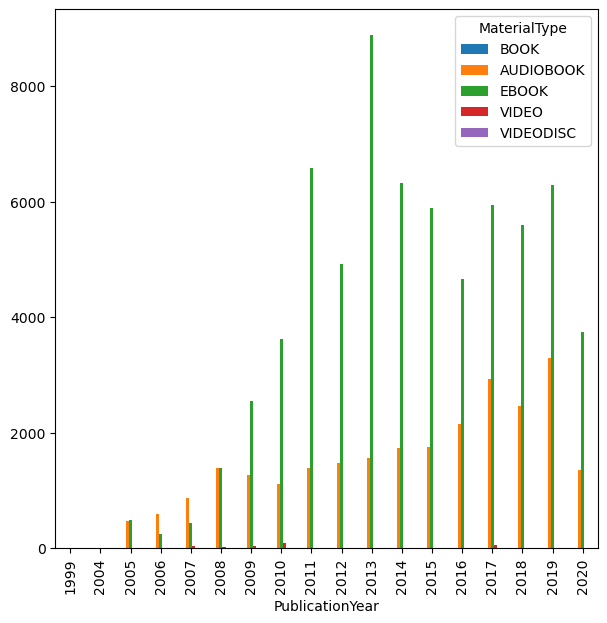

In [47]:
grouped = checkouts_df.groupby(['PublicationYear', 'MaterialType']).size()[:53].unstack(fill_value=0)

plot = grouped.plot(kind="bar", figsize=(7, 7))
print(plot)

### Question

Unpack the stack of methods in the following lines. (No need to run any of the cells for this task.)

What does the .groupby() method output?

What happens when we apply the .size() method?

What happens when we apply the .unstack() method?

In [32]:
nytg_df = pd.read_csv('nyt_full_gender_signal.tsv', sep="\t")
nytg_df

,year,week,rank,title_id,title,author,first_name,gender_signal
0,1931,1931-10-12,1,6477,The Ten Commandments,Warwick Deeping,Warwick,M
1,1931,1931-10-12,2,1808,Finche'S Fortune,Mazo de la Roche,Mazo,U
2,1931,1931-10-12,3,5304,The Good Earth,Pearl S. Buck,Pearl,F
3,1931,1931-10-12,4,4038,Shadows On The Rock,Willa Cather,Willa,F
4,1931,1931-10-12,5,3946,Scarmouche The King Maker,Rafael Sabatini,Rafael,M
...,...,...,...,...,...,...,...,...
60381,2020,2020-12-06,11,2332,I Would Leave Me If I Could,Halsey,Halsey,A
60382,2020,2020-12-06,12,6601,The Vanishing Half,Brit Bennett,Brit,A
60383,2020,2020-12-06,13,7239,Where The Crawdads Sing,Delia Owens,Delia,F
60384,2020,2020-12-06,14,482,Anxious People,Fredrik Backman,Fredrik,M


In [33]:
nytg_df.groupby(['year', 'gender_signal'])

In [34]:
nytg_df.groupby(['year', 'gender_signal']).size()

year  gender_signal
1931  A                  4
      F                  7
      I                  4
      M                  9
      U                  1
                      ... 
2020  A                 63
      F                368
      I                 21
      M                278
      U                  5
Length: 423, dtype: int64

In [35]:
nytg_df.groupby(['year', 'gender_signal']).size().unstack(fill_value=0)

gender_signal,A,F,I,M,U
year,,,,,
1931,4,7,4,9,1
1932,2,60,18,75,1
1933,13,40,14,87,2
1934,13,108,35,241,7
1935,11,135,29,222,18
...,...,...,...,...,...
2016,36,361,20,385,0
2017,64,276,32,426,2
2018,56,335,54,327,8
